In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/idss-aya/data_cleaning.csv
/kaggle/input/house-price/house_prices.csv


In [2]:
df=pd.read_csv('/kaggle/input/idss-aya/data_cleaning.csv')
df

,Amount,Price,location,Carpet_Area,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,42.00,6000.000000,thane,5381.950000,Unfurnished,Unknown,Unknown,1.0,2.0,Unknown
1,98.00,13799.000000,thane,5091.324700,Semi-Furnished,East,Garden/Park,2.0,0.0,Freehold
2,1.40,17500.000000,thane,8385.078100,Unfurnished,East,Garden/Park,2.0,0.0,Freehold
3,25.00,7583.771885,thane,5704.867000,Unfurnished,Unknown,Unknown,1.0,1.0,Unknown
4,1.60,18824.000000,thane,6835.076500,Unfurnished,West,"Garden/Park, Main Road",2.0,0.0,Co-operative Society
...,...,...,...,...,...,...,...,...,...,...
187526,63.00,3225.000000,zirakpur,13544.443604,Semi-Furnished,East,Garden/Park,3.0,3.0,Freehold
187527,55.00,3274.000000,zirakpur,13544.443604,Unfurnished,North - East,"Garden/Park, Main Road",3.0,0.0,Unknown
187528,76.00,4343.000000,zirakpur,13454.875000,Furnished,East,"Garden/Park, Main Road",3.0,2.0,Freehold
187529,30.00,4231.000000,zirakpur,13544.443604,Semi-Furnished,Unknown,Main Road,2.0,0.0,Unknown


In [3]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_34/3364263400.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
14:46:33 - cmdstanpy - INFO - Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] done processing


Enter location:  aya
Enter carpet area (in sqft):  13563
Enter furnishing (Furnished/Unfurnished/Semi-Furnished):  Furnished
Enter facing direction (East/West/North/South):  West
Enter overlooking (Park/Road/Garden):  Garden
Enter number of bathrooms:  2
Enter number of balconies:  1
Enter ownership type (Freehold/Leasehold):  Leasehold



Recommended House Price: 6460000.0
Property Classification: Expensive


/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


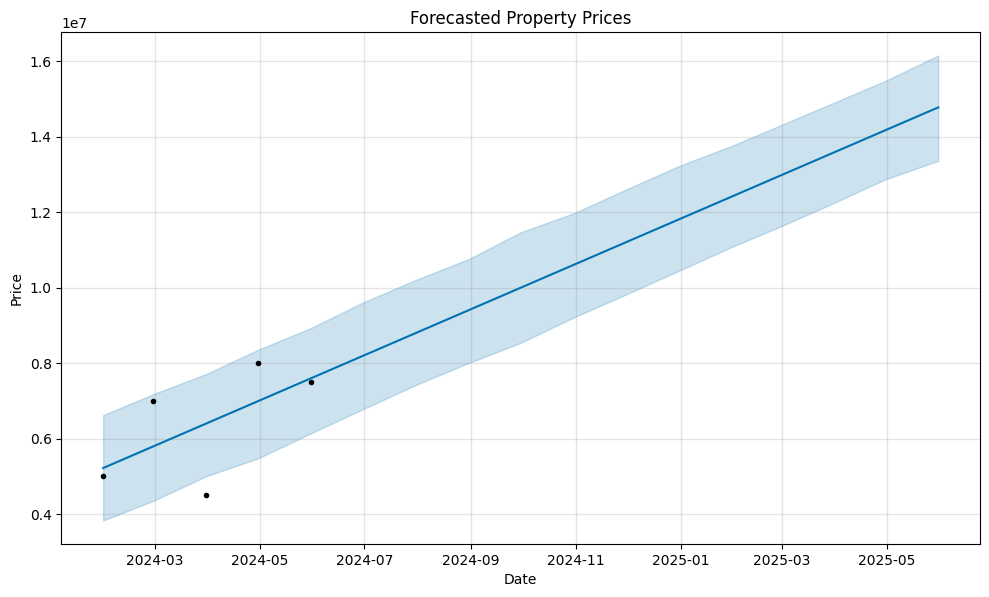

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace with actual data loading)
data = {
    'location': ['A', 'B', 'A', 'C', 'B'],
    'Carpet_Area': [1200, 1500, 1100, 1400, 1600],
    'Furnishing': ['Furnished', 'Unfurnished', 'Semi-Furnished', 'Furnished', 'Unfurnished'],
    'facing': ['East', 'West', 'North', 'South', 'East'],
    'overlooking': ['Park', 'Road', 'Garden', 'Park', 'Road'],
    'Bathroom': [2, 3, 2, 4, 3],
    'Balcony': [1, 2, 1, 3, 2],
    'Ownership': ['Freehold', 'Leasehold', 'Freehold', 'Leasehold', 'Freehold'],
    'Price': [5000000, 7000000, 4500000, 8000000, 7500000],
    'Amount': [4800000, 6800000, 4300000, 7800000, 7300000]
}
df = pd.DataFrame(data)

# Add synthetic date feature
df['date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')

# Preprocess data
def preprocess_data(df):
    label_encoders = {}
    categorical_cols = ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    X = df[['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']]
    y = df['Price']
    
    # Handle missing values in X
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # Handle missing values in y
    y.fillna(y.mean(), inplace=True)
    
    return X, y, label_encoders, imputer

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    joblib.dump(model, 'random_forest_model.pkl')
    return model

# Load model
def load_model():
    return joblib.load('random_forest_model.pkl')

# Property Classifier
class PropertyClassifier:
    def __init__(self, average_price, average_area):
        self.average_price = average_price
        self.average_area = average_area
    
    def classify(self, price, area):
        if price < self.average_price and area < self.average_area:
            return 'Cheap'
        elif price > self.average_price and area > self.average_area:
            return 'Expensive'
        else:
            return 'Average'

# Handle unseen labels
def handle_unseen_labels(le, labels):
    classes = list(le.classes_)
    for label in labels:
        if label not in classes:
            classes.append(label)
    le.classes_ = np.array(classes)
    return le.transform(labels)

# Predict and classify function
def predict_and_classify(Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership, label_encoders, model, classifier, imputer):
    input_data = pd.DataFrame([[Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership]],
                              columns=['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'])
    
    for col in ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']:
        le = label_encoders[col]
        input_data[col] = handle_unseen_labels(le, input_data[col])
    
    # Handle missing values
    input_data = pd.DataFrame(imputer.transform(input_data), columns=input_data.columns)
    
    predicted_price = model.predict(input_data)[0]
    classification = classifier.classify(predicted_price, Carpet_Area)
    
    return predicted_price, classification

# Train forecast model using Prophet
def train_forecast_model(df):
    df_prophet = df[['date', 'Price']].rename(columns={'date': 'ds', 'Price': 'y'})
    forecast_model = Prophet()
    forecast_model.fit(df_prophet)
    joblib.dump(forecast_model, 'forecast_model.pkl')
    return forecast_model

# Load forecast model
def load_forecast_model():
    return joblib.load('forecast_model.pkl')

# Forecast future prices and plot
def forecast_and_plot(forecast_model, periods):
    future = forecast_model.make_future_dataframe(periods=periods, freq='M')
    forecast = forecast_model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    # Plot the forecast
    fig1 = forecast_model.plot(forecast)
    plt.title("Forecasted Property Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Main function
if __name__ == "__main__":
    X, y, label_encoders, imputer = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = train_model(X_train, y_train)
    forecast_model = train_forecast_model(df)
    
    average_price = df['Amount'].mean()
    average_area = df['Carpet_Area'].mean()
    classifier = PropertyClassifier(average_price, average_area)
    
    while True:
        location = input("Enter location: ")
        carpet_area = int(input("Enter carpet area (in sqft): "))
        furnishing = input("Enter furnishing (Furnished/Unfurnished/Semi-Furnished): ")
        facing = input("Enter facing direction (East/West/North/South): ")
        overlooking = input("Enter overlooking (Park/Road/Garden): ")
        bathroom = int(input("Enter number of bathrooms: "))
        balcony = int(input("Enter number of balconies: "))
        ownership = input("Enter ownership type (Freehold/Leasehold): ")
        
        predicted_price, classification = predict_and_classify(location, carpet_area, furnishing, facing, overlooking, bathroom, balcony, ownership, label_encoders, model, classifier, imputer)
        
        print("\nRecommended House Price:", predicted_price)
        print("Property Classification:", classification)
        
        forecast = forecast_and_plot(forecast_model, periods=12)  # Forecast next 12 months
        
        feedback = input("Please provide your feedback on the prediction: ")
        with open("user_feedback.txt", "a") as f:
            f.write(f"Location: {location}, Carpet Area: {carpet_area}, Furnishing: {furnishing}, Facing: {facing}, Overlooking: {overlooking}, Bathroom: {bathroom}, Balcony: {balcony}, Ownership: {ownership}, Predicted Price: {predicted_price}, Classification: {classification}, Feedback: {feedback}\n")
        
        print("Thank you for your feedback!")
        
        retrain = input("Do you want to retrain the model with new feedback data? (yes/no): ")
        if retrain.lower() == 'yes':
            # Load existing data and feedback
            df = pd.read_csv('/kaggle/working/data_cleaning.csv')
            feedback_df = pd.read_csv('user_feedback.txt', delimiter=", ", engine='python')
            
            # Combine original and feedback data
            df = pd.concat([df, feedback_df])
            
            # Preprocess combined data
            X, y, label_encoders, imputer = preprocess_data(df)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Retrain models
            model = train_model(X_train, y_train)
            forecast_model = train_forecast_model(df)
            print("Models retrained with new feedback data.")
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace with actual data loading)
data = {
    'location': ['A', 'B', 'A', 'C', 'B'],
    'Carpet_Area': [1200, 1500, 1100, 1400, 1600],
    'Furnishing': ['Furnished', 'Unfurnished', 'Semi-Furnished', 'Furnished', 'Unfurnished'],
    'facing': ['East', 'West', 'North', 'South', 'East'],
    'overlooking': ['Park', 'Road', 'Garden', 'Park', 'Road'],
    'Bathroom': [2, 3, 2, 4, 3],
    'Balcony': [1, 2, 1, 3, 2],
    'Ownership': ['Freehold', 'Leasehold', 'Freehold', 'Leasehold', 'Freehold'],
    'Price': [5000000, 7000000, 4500000, 8000000, 7500000],
    'Amount': [4800000, 6800000, 4300000, 7800000, 7300000]
}
df = pd.DataFrame(data)

# Add synthetic date feature
df['date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')

# Preprocess data
def preprocess_data(df):
    label_encoders = {}
    categorical_cols = ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    X = df[['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']]
    y = df['Price']
    
    # Handle missing values in X
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    # Handle missing values in y
    y.fillna(y.mean(), inplace=True)
    
    return X, y, label_encoders, imputer

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    joblib.dump(model, 'random_forest_model.pkl')
    return model

# Load model
def load_model():
    return joblib.load('random_forest_model.pkl')

# Property Classifier
class PropertyClassifier:
    def __init__(self, average_price, average_area):
        self.average_price = average_price
        self.average_area = average_area
    
    def classify(self, price, area):
        if price < self.average_price and area < self.average_area:
            return 'Cheap'
        elif price > self.average_price and area > self.average_area:
            return 'Expensive'
        else:
            return 'Average'

# Handle unseen labels
def handle_unseen_labels(le, labels):
    classes = list(le.classes_)
    for label in labels:
        if label not in classes:
            classes.append(label)
    le.classes_ = np.array(classes)
    return le.transform(labels)

# Predict and classify function
def predict_and_classify(Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership, label_encoders, model, classifier, imputer):
    input_data = pd.DataFrame([[Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership]],
                              columns=['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'])
    
    for col in ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']:
        le = label_encoders[col]
        input_data[col] = handle_unseen_labels(le, input_data[col])
    
    # Handle missing values
    input_data = pd.DataFrame(imputer.transform(input_data), columns=input_data.columns)
    
    predicted_price = model.predict(input_data)[0]
    classification = classifier.classify(predicted_price, Carpet_Area)
    
    return predicted_price, classification

# Train forecast model using Prophet
def train_forecast_model(df):
    df_prophet = df[['date', 'Price']].rename(columns={'date': 'ds', 'Price': 'y'})
    forecast_model = Prophet()
    forecast_model.fit(df_prophet)
    joblib.dump(forecast_model, 'forecast_model.pkl')
    return forecast_model

# Load forecast model
def load_forecast_model():
    return joblib.load('forecast_model.pkl')

# Forecast future prices and plot
def forecast_and_plot(forecast_model, periods):
    future = forecast_model.make_future_dataframe(periods=periods, freq='M')
    forecast = forecast_model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    
    # Plot the forecast
    fig1 = forecast_model.plot(forecast)
    plt.title("Forecasted Property Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Main function
if __name__ == "__main__":
    X, y, label_encoders, imputer = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = train_model(X_train, y_train)
    forecast_model = train_forecast_model(df)
    
    average_price = df['Amount'].mean()
    average_area = df['Carpet_Area'].mean()
    classifier = PropertyClassifier(average_price, average_area)
    
    while True:
        location = input("Enter location: ")
        carpet_area = int(input("Enter carpet area (in sqft): "))
        furnishing = input("Enter furnishing (Furnished/Unfurnished/Semi-Furnished): ")
        facing = input("Enter facing direction (East/West/North/South): ")
        overlooking = input("Enter overlooking (Park/Road/Garden): ")
        bathroom = int(input("Enter number of bathrooms: "))
        balcony = int(input("Enter number of balconies: "))
        ownership = input("Enter ownership type (Freehold/Leasehold): ")
        
        predicted_price, classification = predict_and_classify(location, carpet_area, furnishing, facing, overlooking, bathroom, balcony, ownership, label_encoders, model, classifier, imputer)
        
        print("\nRecommended House Price:", predicted_price)
        print("Property Classification:", classification)
        
        forecast = forecast_and_plot(forecast_model, periods=12)  # Forecast next 12 months
        
        feedback = input("Please provide your feedback on the prediction: ")
        with open("user_feedback.txt", "a") as f:
            f.write(f"Location: {location}, Carpet Area: {carpet_area}, Furnishing: {furnishing}, Facing: {facing}, Overlooking: {overlooking}, Bathroom: {bathroom}, Balcony: {balcony}, Ownership: {ownership}, Predicted Price: {predicted_price}, Classification: {classification}, Feedback: {feedback}\n")
        
        print("Thank you for your feedback!")
        
        retrain = input("Do you want to retrain the model with new feedback data? (yes/no): ")
        if retrain.lower() == 'yes':
            # Load existing data and feedback
            df = pd.read_csv('/kaggle/working/data_cleaning.csv')
            feedback_df = pd.read_csv('user_feedback.txt', delimiter=", ", engine='python')
            
            # Combine original and feedback data
            df = pd.concat([df, feedback_df])
            
            # Preprocess combined data
            X, y, label_encoders, imputer = preprocess_data(df)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Retrain models
            model = train_model(X_train, y_train)
            forecast_model = train_forecast_model(df)
            print("Models retrained with new feedback data.")